# 1. Importing the Libraries and Dataset

In [112]:
import os
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [113]:
#my_path='/content/drive/My Drive/Credit Fraud'
#my_file=os.listdir(my_path)[0]
#df=pd.read_csv(my_path+'/'+my_file)
#df['Class'].value_counts()
df=pd.read_csv('creditcard.csv')

# 2. Exploratory Data Analysis

In [114]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


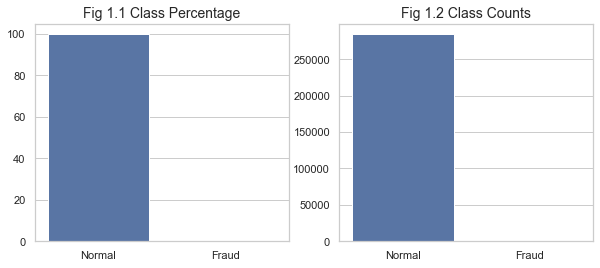

In [115]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig1, ax1 = plt.subplots(1,2,figsize=(10,4))
ax1[0].set_title('Fig 1.1 Class Percentage', fontsize=14)
sns.barplot(x=['Normal','Fraud'],y=[normal_share,fraud_share],ax=ax1[0])
ax1[1].set_title('Fig 1.2 Class Counts', fontsize=14)
sns.barplot(x=['Normal','Fraud'],y=[classes[0],classes[1]],ax=ax1[1])

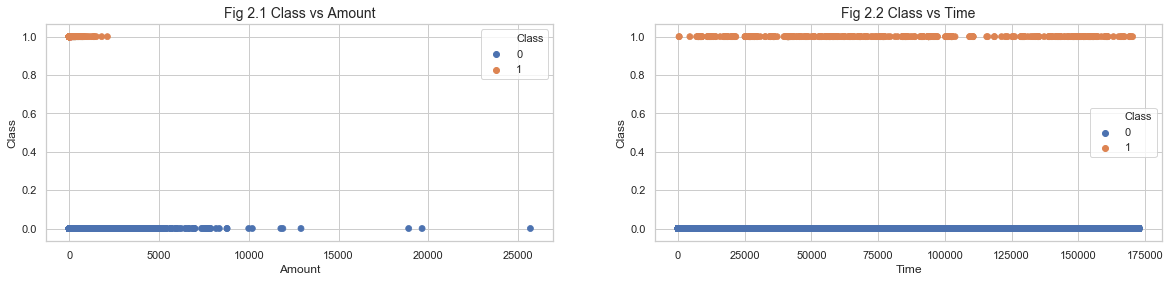

In [116]:
# Create a scatter plot to observe the distribution of classes with time
fig2, ax2 = plt.subplots(1,2,figsize=(20,4))
ax2[0].set_title('Fig 2.1 Class vs Amount', fontsize=14)
sns.scatterplot(x="Amount", y="Class", hue="Class",edgecolor=None,data=df,ax=ax2[0])
ax2[1].set_title('Fig 2.2 Class vs Time', fontsize=14)
sns.scatterplot(x="Time", y="Class", hue="Class",edgecolor=None,data=df,ax=ax2[1])

### 2.1 Time and Amount Features

We notice that the extremely high __Amount__ aren't actually related to the positive class, as one would intutively imagine. There's no boundary possible for amount between Class 0 and 1. Thus we eliminate this <br>
The __Time__ feature is just the time elapsed for each transaction from the first one. Since all the transactions are assumed to be independent of each other, we eliminate this.

In [117]:
df2=df.drop(['Time','Amount'],axis=1)

### 2.2 Visualizaing the Principal Components

We now attempt at visualizing classes in the 3D Subspaces , with 3 principal components at a time. This means , we'll visualize V1,V2,V3 followed by V5,V6,V7 and so on, till V18. Our objective is to vizualize if, both the classes are separable or not.

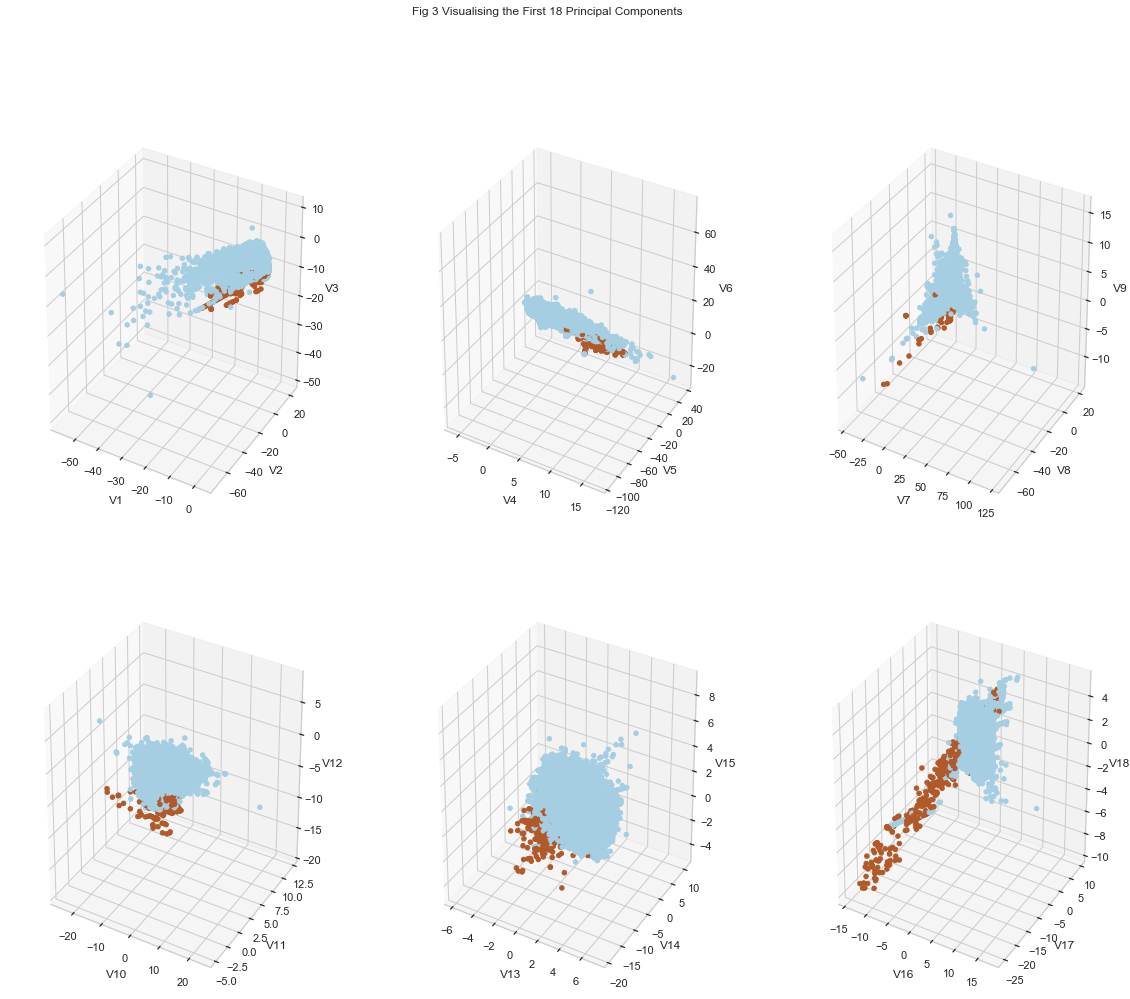

In [118]:
from mpl_toolkits.mplot3d import Axes3D

# The list p_comps holds the feature names from V1 to V28
p_comps=df2.loc[::,'V1':'V28'].columns

# We take features 3 at a time and plot them along the 3 principal components
fig3 = plt.figure(figsize=(20,16))
fig3.suptitle('Fig 3 Visualising the First 18 Principal Components', fontsize=12)
for i in range(0,6):
    n=i*3
    ax = fig3.add_subplot(2,3,i+1, projection='3d')
    g = ax.scatter(df2[p_comps[n]], df2[p_comps[n+1]], df2[p_comps[n+2]], c=df2['Class'], marker='o', depthshade=False, cmap='Paired')
    ax.set_xlabel(p_comps[n])
    ax.set_ylabel(p_comps[n+1])
    ax.set_zlabel(p_comps[n+2]) 

There is indeed some clustering behavior among the two classes. Especially in __V16,V17,V18__ ,  the class-1 points can be seen very clearly. However, we can see no apparent linear boundary in these sub-spaces, though at a higher dimension it may exist.

### 2.3 Drop Statistically Insignificant Features

We will now attempt a first round elimination of features using statistical methods. For every feature , we can break the data into two populations , each corresponding to the two classes. Then we propose a null hypothesis that $H_0:\mu_1=\mu_2$. <br> To form the correct statistical test, we notice the following<br>

- Populations Are Normally Distributed. This was mentioned in the problem statement itself.
- Populations Have Equal Variances. This is an assumption we make and we note that $\sigma_1$ and $\sigma_2$ are unknown. 
- Samples Are Independent.

In view of this, for each feature we perform a two sample t-test. Features which give us large p-values ( >0.05 ) indicate that $H_0$ cannot be rejected and thus can be dropped.

In [119]:
# We'll add feature names to be dropped.
dropped_features=[]

for feature in p_comps:
    # Create the two samples X1 and X2 based on class they belong to
    x1=df[df['Class']==1][feature]
    x2=df[df['Class']==0][feature]

    # Calculate the t-statistic and p-value
    t_stat,p_val=stats.ttest_ind(x1, x2, equal_var = True)

  # Is p-value in acceptance region ?
    if p_val>0.05:
        print('p value is {0:2.4f}'.format(p_val),',Cannot reject H0 for',feature)
        # Cannot reject H0, so feature can be dropped.
        dropped_features.append(feature)

# We can drop the high p-value features
df3=df2.drop(dropped_features,axis=1)

p value is 0.6674 ,Cannot reject H0 for V22
p value is 0.1519 ,Cannot reject H0 for V23
p value is 0.0775 ,Cannot reject H0 for V25


### 2.4 Pre-processing - Power Transformation and Scaling

In this step we'll check the skewness of the data and deal with it using power transformation.

In [5]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA,QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,roc_curve,roc_auc_score,auc,confusion_matrix
import pickle

We'll split the data into a training set and a __hold out test__ set in 80:20 Ratio. Since minority class is very low, we'll make sure to us stratify the train test split.<br> Later, we'll run a 4-fold Stratified Validation on the train set.

In [121]:
X=df3.drop('Class',axis=1)
y=df3['Class']

# The X_test and y_test will be kept completely isolated and use it as hold out set.
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [122]:
print('Percentage of Minority Class in train Set {:.4f}%'.format(100*y_train.value_counts()[1]/y_train.shape[0]))
print('Percentage of Minority Class in hold out test Set {:.4f}%'.format(100*y_test.value_counts()[1]/y_test.shape[0]))

Percentage of Minority Class in train Set 0.1729%
Percentage of Minority Class in hold out test Set 0.1720%


We'll  use power transformation to eliminate any skewness. After fitting a power-transformer on the train set, we'll transform the test set as well. 

In [123]:
# Fit a power transformer on the train set and use it to transform the test set 
pt=PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pt.fit(X_train)
X_train=pd.DataFrame(pt.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(pt.transform(X_test),columns=X_train.columns)

In [124]:
# Fit a min-max scaler on the train set and use it to transform the test set 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

### 2.5 Oversampling of Minority Class

In this section we see the impact of the Oversampling techniques, which we'll later use in the model building. We apply SMOTE and ADASYN respectively to the train set. Also recall, that the principal components __V16,V17 and V18__ could show the two classes most distinctly. So we use the same components to visualize the oversampled datasets.

In [125]:
sm=SMOTE()
ad=ADASYN()
X_smt, y_smt = sm.fit_resample(X_train, y_train)  
X_ads, y_ads = ad.fit_resample(X_train, y_train)

In [167]:
print('Minority Classes with and without Oversampling on Training Set')
print('No. of positive Classes is {} at {:0.4f} %'.format(y_train.sum(),100*y_train.sum()/y_train.shape[0]))
print('No. of positive Classes with SMOTE is {} at {:0.2f} %'.format(y_ads.sum(),100*y_ads.sum()/y_ads.shape[0]))
print('No. of positive Classes with ADASYN is {} at {:0.2f} %'.format(y_smt.sum(),100*y_smt.sum()/y_smt.shape[0]))

Minority Classes with and without Oversampling on Training Set
No. of positive Classes is 394 at 0.1729 %
No. of positive Classes with SMOTE is 227460 at 50.00 %
No. of positive Classes with ADASYN is 227451 at 50.00 %


Text(0.5, 0.92, 'Fig 4.3 ADASYN Oversampling')

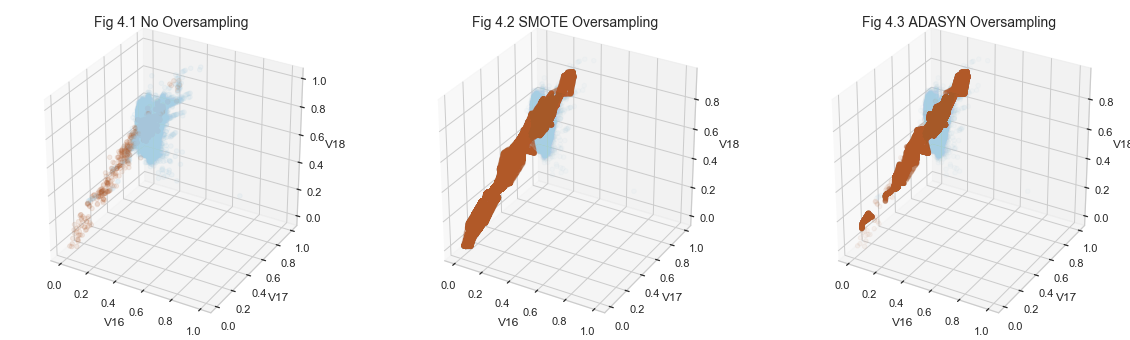

In [126]:
fig4 = plt.figure(figsize=(20,6))

# Plot the train set without oversampling
ax4 = fig4.add_subplot(131, projection='3d')
ax4.scatter(X_train['V16'], X_train['V17'], X_train['V18'], c=y_train, marker='o', cmap='Paired',alpha=0.1)
ax4.set_xlabel('V16')
ax4.set_ylabel('V17')
ax4.set_zlabel('V18')
ax4.set_title('Fig 4.1 No Oversampling', fontsize=14)

# Plot the SMOTE transformed train set , To reduce processing time, we plot every alternate point
ax4 = fig4.add_subplot(132, projection='3d')
# The ::2 in the slicers select every alternate points
ax4.scatter(X_smt.iloc[::2,15], X_smt.iloc[::2,16], X_smt.iloc[::2,17], c=y_smt[::2], marker='o', cmap='Paired',alpha=0.05)
ax4.set_xlabel('V16')
ax4.set_ylabel('V17')
ax4.set_zlabel('V18')
ax4.set_title('Fig 4.2 SMOTE Oversampling', fontsize=14) 

# Plot the ADASYB transformed train set. To reduce processing time, we plot every alternate point
ax4 = fig4.add_subplot(133, projection='3d')
# The ::2 in the slicers select every alternate points
ax4.scatter(X_ads.iloc[::2,15], X_ads.iloc[::2,16], X_ads.iloc[::2,17], c=y_ads[::2], marker='o', cmap='Paired',alpha=0.05)
ax4.set_xlabel('V16')
ax4.set_ylabel('V17')
ax4.set_zlabel('V18')
ax4.set_title('Fig 4.3 ADASYN Oversampling', fontsize=14)  

# 3. Building the Classifier

We will reach the final model in incremental steps. We start by establishing the baseline with a Logistic regression Model using a workflow with pipeline<br>

- Use a __stratified 4 fold__ cross validation method on the transformed and scaled train set. The hold out test set will be completely isolated.
- The minority class in each fold is upsampled using either __SMOTE__ or __ADASYN__.
- We'll make our choice of the oversampling method in the baseline model itself. Once this choice is made, we'll use it on all future models.
- Fit Chosen Classifer on the test data using the GridSearchCV parameter grid.
- Find the best hyperparameter and run the model on the __hold out__ test set.

### 3.1 Logistic Regression

At this stage we have scaled train and hold out test sets with 80% and 20% of data. This means, there are ~100 Class-1's in Hold Out test Set and ~400 in test set. Thus, if we run a 4-fold stratified cross validation on the train set, we'll have 100 Class-1's in every fold.<br>
We are now set to build the first baseline model using Logistic Regression. 

- The optimum regularization __L1 or L2__ will be found using __GridSearchCV__.
- The regularization strength __C__ is a another hyperparameter, that we'll choose from 1,10,100 respectively.
- We'll also choose the best Oversampling technique.

In [127]:
#  We have 80% of data in train set, so we use a 4 fold cross val to have roughly 100 Class-1 Samples
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 42)

# We shall define 3 pipelines one without oversamplig followed by one each for SMOTE and ADASYN
my_pipe=Pipeline([('logisticregression',LogisticRegression())])

# The next two pipelines are one each for SMOTE and ADASYN
# Our pipeline my_pipe, shall first oversample the minority class and then fit the logistic regression

my_smote_pipe=Pipeline([('smote',SMOTE(random_state = 42)),('logisticregression',LogisticRegression())])
my_asyn_pipe=Pipeline([('smote',ADASYN(random_state = 42)),('logisticregression',LogisticRegression())])


# In this case we just have two hyperparameters , C and a choice of Ridge vs Lasso.
# The  parameter grid is in my_grid. The regulrization strength is to be chosen from 10^-3 to 10^3
params = {"C":[1,10,100], "penalty":["l1","l2"]}
my_grid={'logisticregression__' + key: params[key] for key in params}

In [128]:
# The GridsearchCV runs on the my_pipe and my_grid
# We define 3 classifiers for the three pipelines, so that we can compare there performance
logistic_clf = GridSearchCV(my_pipe, param_grid = my_grid, cv = skf, scoring='roc_auc',verbose = 1,n_jobs=-1,return_train_score=False)
logistic_clf_smote = GridSearchCV(my_smote_pipe, param_grid = my_grid, cv = skf, scoring='roc_auc',verbose = 1,n_jobs=-1,return_train_score=False)
logistic_clf_asyn = GridSearchCV(my_asyn_pipe, param_grid = my_grid, cv = skf, scoring='roc_auc',verbose = 1,n_jobs=-1,return_train_score=False)

best_logistic=logistic_clf.fit(X_train, y_train)
best_logistic_smote=logistic_clf_smote.fit(X_train, y_train)
best_logistic_asyn=logistic_clf_asyn.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.2s finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.9s finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   47.7s finished


We have three classifiers at hand , so we can check their performance on the hold out test set.

In [129]:
# Run the best model to predict the test set
y_test_predict = best_logistic.predict(X_test)
lr_auc_score=metrics.roc_auc_score(y_test, y_test_predict)
print('Logistic Regression AUC on Test Set No Oversampling {:.4f}'.format(lr_auc_score))
y_test_predict = best_logistic_smote.predict(X_test)
lr_auc_score=metrics.roc_auc_score(y_test, y_test_predict)
print('Logistic Regression AUC on Test Set with SMOTE {:.4f}'.format(lr_auc_score))
y_test_predict = best_logistic_asyn.predict(X_test)
lr_auc_score=metrics.roc_auc_score(y_test, y_test_predict)
print('Logistic Regression AUC on Test Set with ADASYN {:.4f}'.format(lr_auc_score))

Logistic Regression AUC on Test Set No Oversampling 0.8213
Logistic Regression AUC on Test Set with SMOTE 0.9461
Logistic Regression AUC on Test Set with ADASYN 0.9169


Undoubtedly oversampling __gave us a gain of >10%__. However, among the two oversampling techniques SMOTE is best. Thus, this'll be our chosen oversampling method.

#### 3.1.1 Baseline Model Parameters

We can check the hyperparameters for the best model generated by SMOTE oversampling.

In [130]:
print('Best Hyperparameters')
print('C ',best_logistic.best_params_['logisticregression__C'])
print('Regularization ',best_logistic_smote.best_params_['logisticregression__penalty'])

Best Hyperparameters
C  10
Regularization  l2


That's actually very good model. The AUC to beat now is 0.9483 using other methods.

In [131]:
# Save the Logistic Model without SMOTE for later use
filename = 'best_logistic_no_smote.sav'
pickle.dump(best_logistic, open(filename, 'wb'))

# Save the Logistic Model for later use
filename = 'best_logistic_smote.sav'
pickle.dump(best_logistic_smote, open(filename, 'wb'))

### 3.2 LDA and QDA

Since the problem statement mentions that all the features are Gaussian in nature, we can make the assumption that p(x | y) is a Gaussian distribution.This gives us the opportunity to attempt __LDA__ and __QDA__. We attempt both the models in a pipeline  and see which one fares better.

In [132]:
my_pipe=Pipeline([('smote',SMOTE(random_state = 42)),('classifier',QDA())])
lda_grid = [
    {'classifier' : [QDA()]},
    {'classifier' : [LDA()],
     'classifier__solver' : ['svd', 'lsqr','eigen']}    
]
lda_clf = GridSearchCV(my_pipe, param_grid = lda_grid, cv = skf, scoring='roc_auc',verbose = 1,n_jobs=-1,return_train_score=False)
best_lda = lda_clf.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   11.6s finished


In [133]:
# Save the LDA Model for later use
filename = 'best_lda.sav'
pickle.dump(best_lda, open(filename, 'wb'))
best_lda.best_params_

{'classifier': LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 'classifier__solver': 'svd'}

Among LDA and QDA , the Gridsearch has rated the former as better.

In [134]:
y_test_predict = best_lda.predict(X_test)
lda_auc_score=metrics.roc_auc_score(y_test, y_test_predict)
print('LDA AUC on Test Set {:.4f}'.format(lda_auc_score))

LDA AUC on Test Set 0.9394


That's somewhat less compared to Logistic regression. Financially, this may translate to a huge loss.

### 3.3 KNN Model

We now switch to KNN Model. Since our preferred oversampling is __SMOTE__ , we'll us the pipeline __my_smote_pipe__ for fitting the __GridSearchCV__ method.

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
my_knn_pipe=Pipeline([('smote',SMOTE(random_state = 42)),('knn', KNeighborsClassifier(algorithm='auto',n_jobs=-1))])
knn_grid = {
        'knn__n_neighbors': [20,30,40],
        'knn__weights':['distance','uniform']
        }

knn_clf = GridSearchCV(my_knn_pipe, param_grid = knn_grid, cv = skf, scoring='roc_auc',verbose = 1,n_jobs=-1,return_train_score=False)

In [137]:
best_knn = knn_clf.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 18.3min finished


In [138]:
y_test_predict = best_knn.predict(X_test)
knn_auc_score=metrics.roc_auc_score(y_test, y_test_predict)
print('LDA AUC on Test Set {:.4f}'.format(knn_auc_score))

LDA AUC on Test Set 0.9399


In [139]:
# Save the KNN Model for later use
filename = 'best_knn.sav'
pickle.dump(best_knn, open(filename, 'wb'))
best_knn.best_params_

{'knn__n_neighbors': 40, 'knn__weights': 'distance'}

### 3.4 XGBoost Model

Despite multiple attempts , we weren't able to put SMOTE in the pipeline and search the best Hyper-parameters. The time taken was abnormally large. Thus after trying on local work-station, Nimblebox and Google Colab, we simply put the best parameters in the parameter grid.

In [142]:
import xgboost as xgb

In [143]:
#xboost=xgb.XGBClassifier(tree_method='exact',max_bin=16,random_state=42,nthread=2,n_gpus=1, objective='binary:logistic')
my_xgb_pipe=Pipeline([('smote',SMOTE(random_state = 42)),
                      ('xgb', xgb.XGBClassifier(tree_method='exact',max_bin=16,random_state=42,nthread=2, objective='binary:logistic'))])

# Due to abnormally large training times , we just retain the best parameters found from
# Nimblebox, Colaband and local workstation.
# Our Hyperparameter grid for XGBoost
gb_grid = {
        'xgb__n_estimators':[400],
        'xgb__max_depth': [6],
        'xgb__learning_rate':[0.001],
        'xgb__subsample':[1],
        'xgb__colsample_bytree':[1.0]
        }

xgb_clf = GridSearchCV(my_xgb_pipe, param_grid = gb_grid, cv = skf,
                       scoring='roc_auc',verbose = 10,n_jobs=4,return_train_score=True)

In [144]:
best_xgb = xgb_clf.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed: 13.3min remaining: 13.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 13.3min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 13.3min finished


In [145]:
y_test_predict = best_xgb.predict(X_test)
xgb_auc_score=metrics.roc_auc_score(y_test, y_test_predict)
print('XGB AUC on Test Set {:.4f}'.format(xgb_auc_score))

XGB AUC on Test Set 0.9357


In [146]:
best_xgb.best_params_

{'xgb__colsample_bytree': 1.0,
 'xgb__learning_rate': 0.001,
 'xgb__max_depth': 6,
 'xgb__n_estimators': 400,
 'xgb__subsample': 1}

In [147]:
best_xgb_model=best_xgb.best_estimator_
#pickle.dump(best_xgb_model, open("best_xgb.sav", "wb"))

# 4. Comparing all Models

We now have 5 models. The first one without oversampling and the remaining with SMOTE. 

- Logistic Regression without Oversampling
- Logistic Regression with SMOTE __( We established that SMOTE was performing better than ADASYN )__
- LDA with SMOTE
- KNN with SMOTE
- XGBOOST with SMOTE

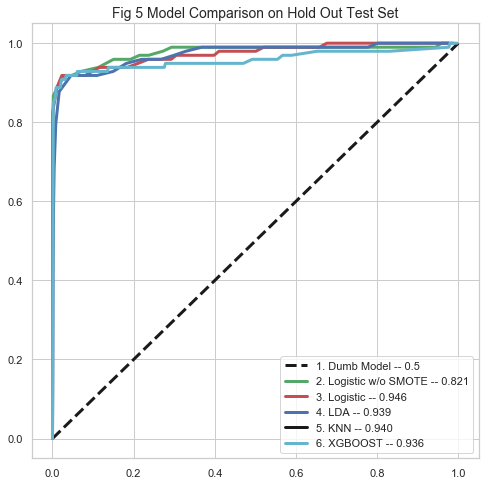

In [149]:
fig5,ax5 = plt.subplots(1,1,figsize=(8,8))
ax5.set_title('Fig 5 Model Comparison on Hold Out Test Set', fontsize=14)
ax5 = sns.lineplot(x=[0,1], y=[0,1],label='1. Dumb Model -- 0.5',linewidth= 3,color='k')
ax5.lines[0].set_linestyle("--")

# We make a list of the model and model names built so far
models=[best_logistic,best_logistic_smote,best_lda,best_knn,best_xgb_model]
model_names=['Logistic w/o SMOTE','Logistic','LDA','KNN','XGBOOST']
colors=['g','r','b','k','c']

# We simply loop through the models and draw the ROC-AUC curve for each.
for i in range(0,5):
    # Predict the class probabilities for the ith model
    y_proba=models[i].predict_proba(X_test)

    # Keep only the positive class probabilities
    y_proba = y_proba[:, 1]

    # Calculated the predicted class to get AUC
    y_test_predict = models[i].predict(X_test)
    auc_score=metrics.roc_auc_score(y_test, y_test_predict)

    # Generate the FPR and TPR for the ROC Curve
    fpr, tpr, thds = roc_curve(y_test, y_proba)
    # To save processing time we'll plot the curve every after 20 points.
    label=str(i+2)+'. {} -- {:.3f}'.format(model_names[i],auc_score)
    ax5 = sns.lineplot(x=fpr[::20], y=tpr[::20],label=label,linewidth= 3,color=colors[i])

# 5. Cost Benefit Analysis on Hold Out test Set

We were expecting that XGBOOST to be best model, however due to awfully long tuning times , we couldn't continue hyperparameter tuning. So we choose Logistic Regression that we built using SMOTE. We will now choose an appropriate threshold. <br> We take the best Logistic Model from our earlier used gridsearchcv object and plot the ROC-AUC curve along with the thresholds

In [3]:
# Extract the best estimator from the best_logistic_smote grid-search-cv object
best_of_all=best_logistic_smote.best_estimator_

In [6]:
# Evaluate the class prediction probabilities and retain only class-1  probabilities
y_proba=best_of_all.predict_proba(X_test)
y_proba = y_proba[:, 1]

# Evaluate the metrics for various thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_proba)
# compute AUC
roc_auc = auc(fpr, tpr) 

### 5.1 Choosing the Correct Threshold

The plot below will help us to estimate the correct threshold, so as to arrive at a correct FPR-TPR combination.

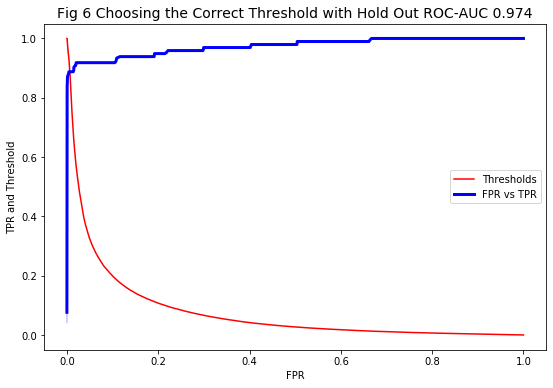

In [7]:
# Plotting the Threshold on the ROC Curve
fig6 = plt.figure(figsize=(9,6))

ax6 = fig6.add_subplot(111)
ax6.set_title('Fig 6 Choosing the Correct Threshold with Hold Out ROC-AUC {:0.3f}'.format(roc_auc), fontsize=14)
ax6.set_ylabel('TPR and Threshold')
ax6.set_xlabel('FPR')
 
# Plot the AUC Curve
ax6=sns.lineplot(fpr[1::], thresholds[1::], markeredgecolor='r',linestyle='dashed', color='r',label='Thresholds')
# Plot the Thresholds Curve
ax6=sns.lineplot(x=fpr[1::], y=tpr[1::],linewidth= 3,color='b',label='FPR vs TPR')

At this point, choosing the correct threshold is a business decision. Aiming a large TPR would also lead to high number of false negatives as well. Thus the Call Costs @ Rs10 may overshadow the savings.
We choose a threshold of __0.75__ so that __TPR = 89%__ and __FPR=1%__.<br>

### 5.2 Confusion Matrix

Having chosen the threshold, we need to convert the prediction probabilities to predicted classes and then plot the confusion matrix. __We recall, that in the hold out test set, there are approximately 100  Positive cases__. Let us see, how much of these are we able to capture.

In [66]:
# Convert Prediction probabilities to class Predictions
y_pred=np.where(y_proba>0.75,1,0)

# Generate Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 33.0, 'Predicted label')

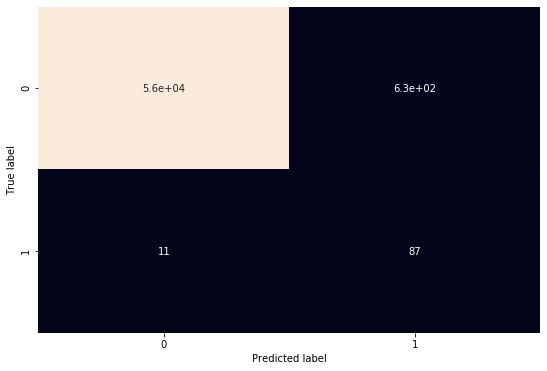

In [67]:
plt.figure(figsize=(9,6))
df_cm = pd.DataFrame(cm, index = [0,1],columns = [0,1])
sns.heatmap(df_cm, annot=True,cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 5.3 Net Savings - Cost Benefit Analysis

Thus , among the 98 positive cases we have successfully captured 87. The flipside is , that almost 630 false cases are also triggered.<br>

We will now find out the actual savings/losses.

- Savings = sum of transactions for true positives
- Losses = sum of transactaions for false negatives
- Costs = Calls Costs @ Rs10 for True Positives and False Positives

We do these calculations on the Hold Out Test Set

In [73]:
# Identify the indices from the labels of test set
ids=list(y_test.index)

# Extract the Amount corresponding to these indices from the original data
transactions=df.loc[ids,'Amount']

In [74]:
# We make a dataframe containing the amount , the ground truths and the predicted labels
# from those indices
save_df=pd.DataFrame({'Transactions':transactions,'Ground Truth':y_test,
                      'Predicted':y_pred})#.to_csv('Predictions.csv',index=False)

In [75]:
# We Sum the amounts for false negatives and call it loss
loss=savings[(save_df['Predicted']==0) & (save_df['Ground Truth']==1)]['Transactions'].sum()

# We sum the amounts for the true positives and call then savings
savings=savings[(save_df['Predicted']==1) & (save_df['Ground Truth']==1)]['Transactions'].sum()

In [86]:
# Calculate the amounts corresponding to ground truths with positive classes
fraud_amounts=save_df[save_df['Ground Truth']==1]['Transactions'].sum()
print('Fraud Amount is {}'.format(fraud_amounts))

# This is our savings amount
print('Savings {:0.3f}'.format(savings-((cm[0,1]+cm[1,1])*10+loss)))

Fraud Amount is 10644.93
Savings -208.070


We have minimised the losses to Rs 208.00. Without using the model the loss would have been Rs10644.